### Import libraries and data

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [28]:
#reading data
happy_data =  pd.ExcelFile('happiness_all_years.xlsx')
happy_data = happy_data.parse('Sheet1')

#Sorting data based on overall rank  yearwise
happy_data = happy_data.sort_values(['Overall rank','Year'])

happy_data.head(5)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
4,1,Switzerland,7.587,1.396510,1.349510,0.941430,0.665570,0.296780,0.419780,2015
0,1,Denmark,7.526,1.441780,1.163740,0.795040,0.579410,0.361710,0.444530,2016
3,1,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2017
1,1,Finland,7.632,1.305000,1.592000,0.874000,0.681000,0.202000,0.393000,2018
2,1,Finland,7.769,1.340000,1.587000,0.986000,0.596000,0.153000,0.393000,2019


### Plotting data and checking correlation

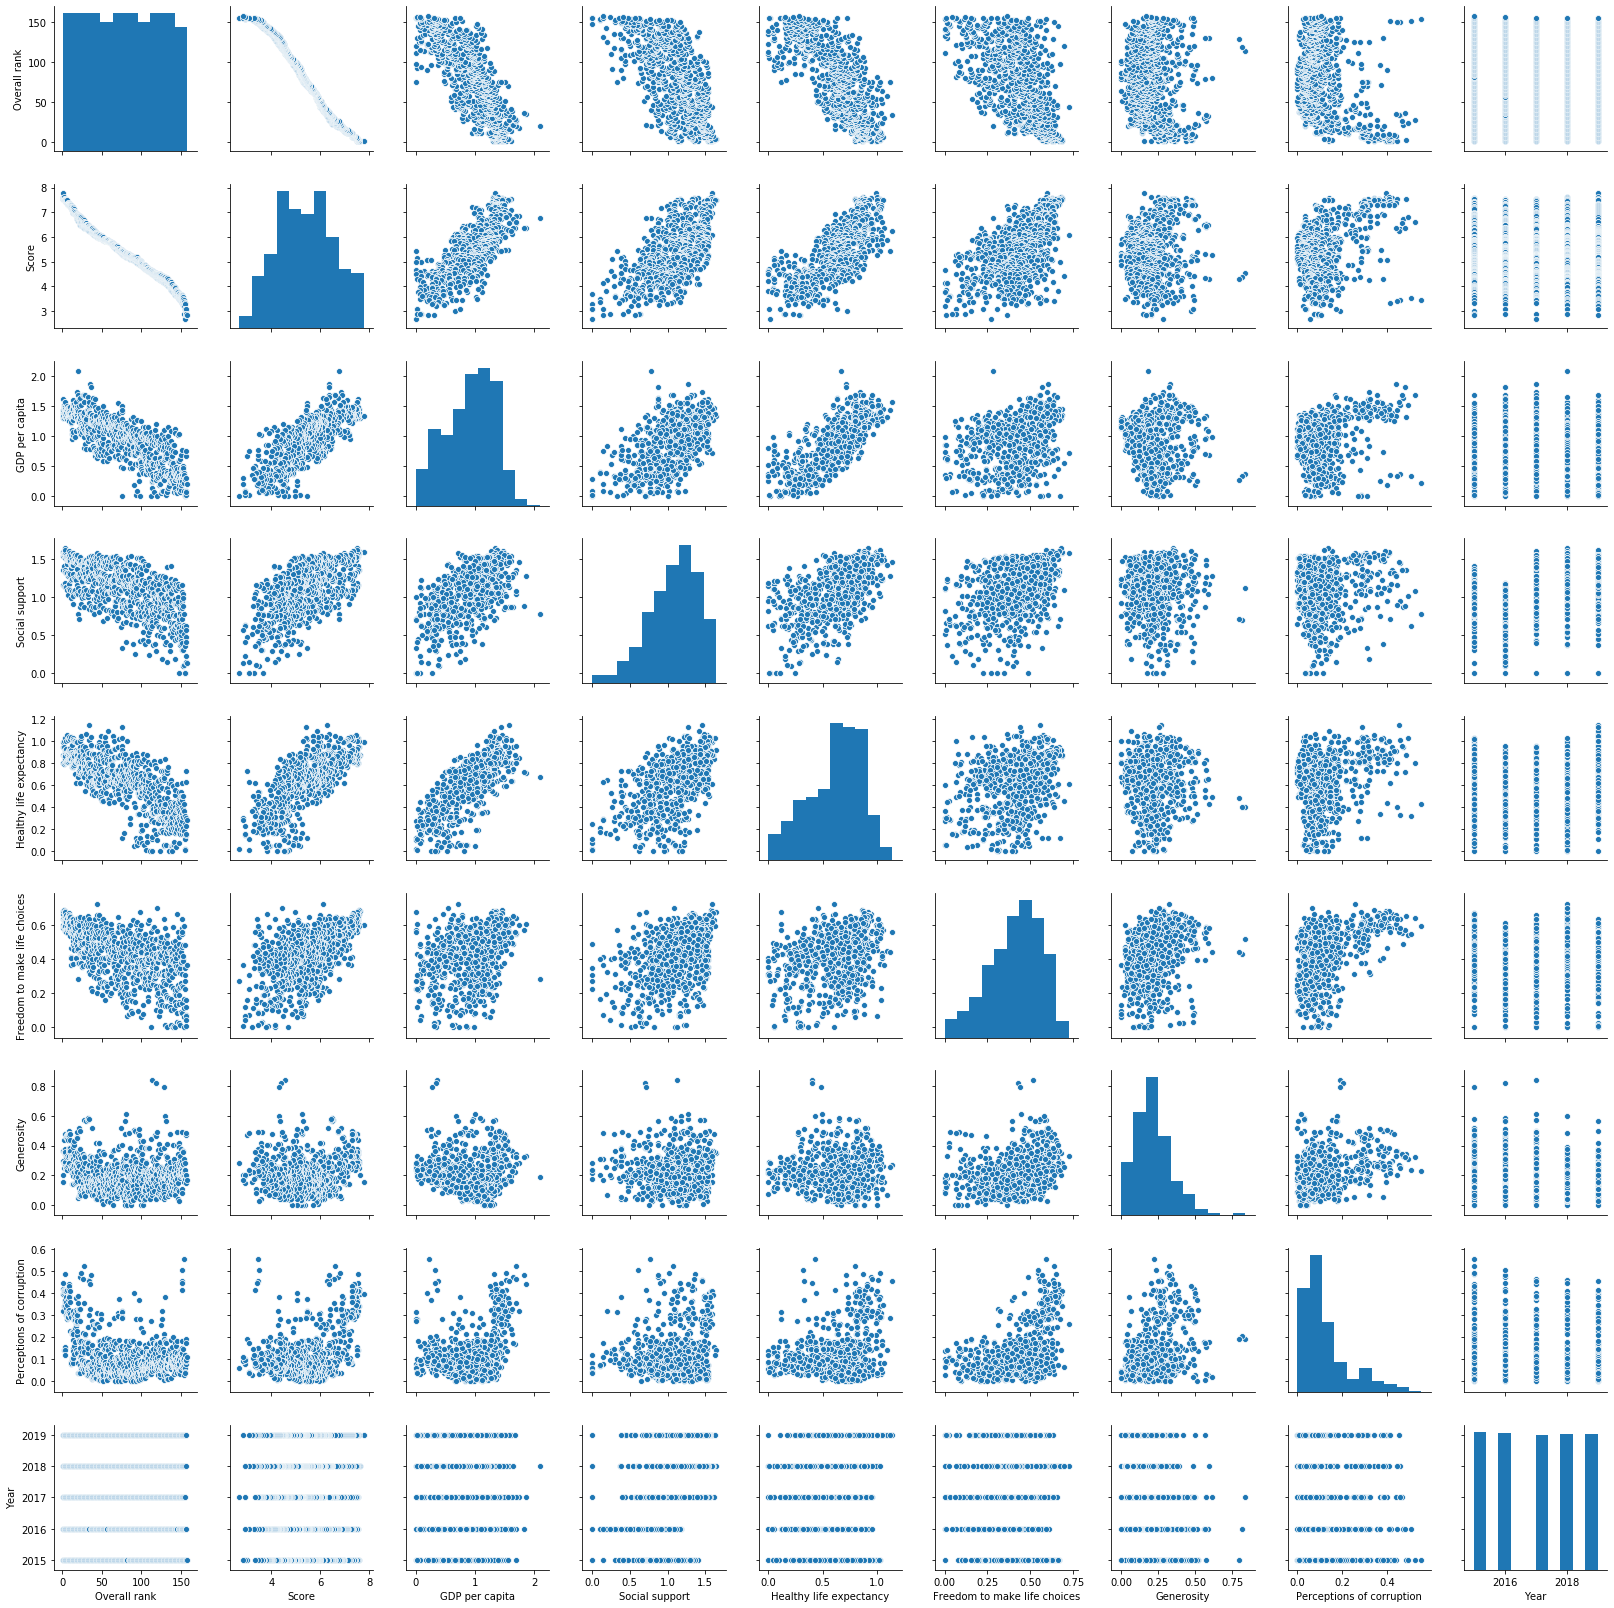

In [29]:
sns.pairplot(happy_data)

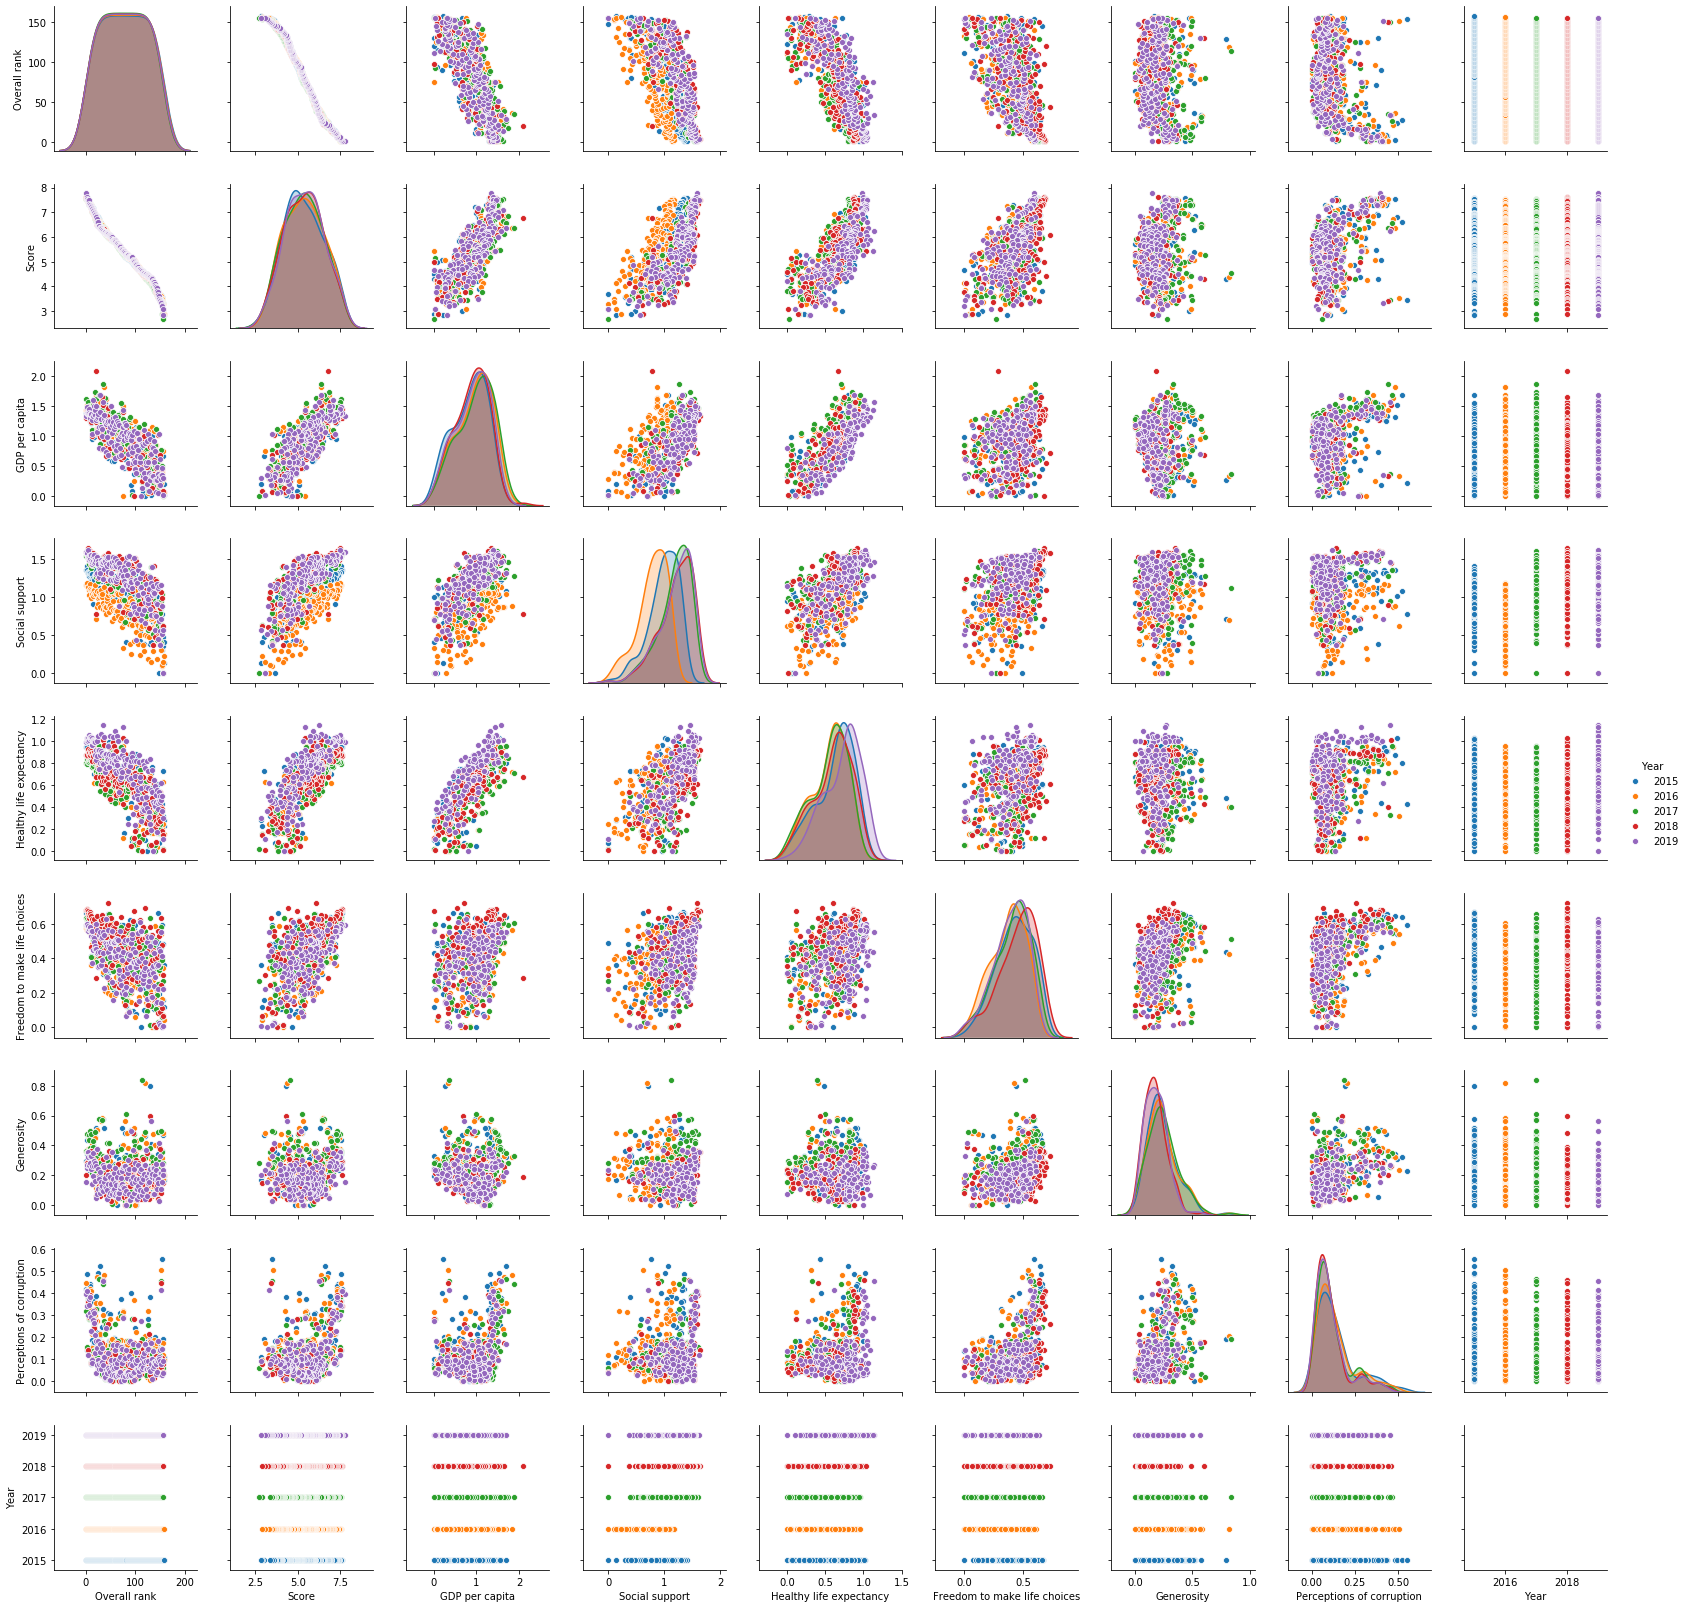

In [30]:
sns.pairplot(happy_data,hue='Year')

In [31]:
happy_data.corr()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
Overall rank,1.000000,-0.992066,-0.794791,-0.644842,-0.743655,-0.537942,-0.117713,-0.372781,-0.007768
Score,-0.992066,1.000000,0.789284,0.648799,0.742456,0.551258,0.137578,0.398418,0.007065
GDP per capita,-0.794791,0.789284,1.000000,0.585966,0.784338,0.340511,-0.014560,0.306307,0.019768
Social support,-0.644842,0.648799,0.585966,1.000000,0.572650,0.420361,-0.037262,0.126401,0.367431
Healthy life expectancy,-0.743655,0.742456,0.784338,0.572650,1.000000,0.340745,0.010638,0.250512,0.130302
Freedom to make life choices,-0.537942,0.551258,0.340511,0.420361,0.340745,1.000000,0.290706,0.459593,0.010353
Generosity,-0.117713,0.137578,-0.014560,-0.037262,0.010638,0.290706,1.000000,0.318920,-0.192587
Perceptions of corruption,-0.372781,0.398418,0.306307,0.126401,0.250512,0.459593,0.318920,1.000000,-0.122264
Year,-0.007768,0.007065,0.019768,0.367431,0.130302,0.010353,-0.192587,-0.122264,1.000000


In [32]:
happy_data = happy_data[['Overall rank','Country or region','GDP per capita','Social support','Healthy life expectancy','Year']]

### Plotting countries on world map based on level of happiness

In [33]:
# Reading coordinates data of countries
coord = pd.read_excel('coordinates.xlsx')
coord.head()

,country,latitude,longitude,name
0,AQ,-75.250973,-0.071389,Antarctica
1,GS,-54.429579,-36.587909,South Georgia and the South Sandwich Islands
2,BV,-54.423199,3.413194,Bouvet Island
3,HM,-53.081810,73.504158,Heard Island and McDonald Islands
4,FK,-51.796253,-59.523613,Falkland Islands [Islas Malvinas]


In [34]:
long = coord[['longitude','name']].set_index('name')
lat = coord[['latitude','name']].set_index('name')

#Writing latitudes and longitudes data to dictionary

long = long.to_dict()['longitude']
lat = lat.to_dict()['latitude']

In [35]:
#Initializing latitudes and longitudes values to null values

happy_data['long'] = np.nan
happy_data['lat'] = np.nan

#Writing latitudes and longitudes data to happy_data w.r.t countries

for i in list(long.keys()): 
    temp_list = happy_data['Country or region'] == i
    happy_data['long'][temp_list] = long[i]
    happy_data['lat'][temp_list] = lat[i]
    
happy_data.head()

D:\New folder\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\New folder\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
D:\New folder\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: ht

,Overall rank,Country or region,GDP per capita,Social support,Healthy life expectancy,Year,long,lat
4,1,Switzerland,1.396510,1.349510,0.941430,2015,8.227512,46.818188
0,1,Denmark,1.441780,1.163740,0.795040,2016,9.501785,56.263920
3,1,Norway,1.616463,1.533524,0.796667,2017,8.468946,60.472024
1,1,Finland,1.305000,1.592000,0.874000,2018,25.748151,61.924110
2,1,Finland,1.340000,1.587000,0.986000,2019,25.748151,61.924110


In [36]:
# Making a data frame with dots to show on the map
data = pd.DataFrame({
    'long':happy_data['long'],
    'lat':happy_data['lat'],
    'name':happy_data['Country or region']
})
 
# Make an empty map
m = folium.Map(location=[20, 0], tiles="Stamen Toner",zoom_start=3)
 
# Adding markers on the map
color = 'red'
for i,j in zip(range(len(data)),list(happy_data['Overall rank'])):
    if j <= 10:
        color = 'green'
    elif j <= 50 :
        color = 'orange'
    elif j <= 100 :
        color = 'red'
    else :
        color = 'pink'
    folium.Marker([data.iloc[i]['lat'], data.iloc[i]['long']], popup=data.iloc[i]['name'],icon=folium.Icon(color=color)).add_to(m)

# Adding legend
legend_html = '''
     <div style="position: fixed; 
     bottom: 200px; left: 50px; width: 250px; height: 150px; 
     border:2px solid grey; z-index:9999; font-size:14px;
     ">&nbsp;<br>
     &nbsp;<span style="color:white"> Happiest Countries </span> &nbsp; <i class="fa fa-map-marker fa-2x"
                  style="color:green"></i><br>
     &nbsp;<span style="color:white"> Happy countries </span> &nbsp; <i class="fa fa-map-marker fa-2x"
                  style="color:orange"></i><br>
     &nbsp;<span style="color:white"> Somewhat Happy countries </span> &nbsp; <i class="fa fa-map-marker fa-2x"
                  style="color:red"></i><br>
     &nbsp;<span style="color:white"> Not Happy countries </span> &nbsp; <i class="fa fa-map-marker fa-2x"
                  style="color:pink"></i>
      </div>
     '''
    
m.get_root().html.add_child(folium.Element(legend_html))
    
# Save it as html
m.save('map.html')